# Species Segmentation with Cluster Analysis

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [3]:
data=pd.read_csv('iris_dataset.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Plot the data

Text(0, 0.5, 'petal_width')

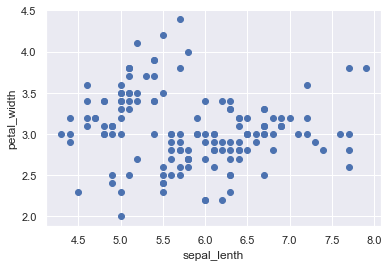

In [7]:
plt.scatter(data['sepal_length'],data['sepal_width'])
plt.xlabel('sepal_lenth')
plt.ylabel('petal_width')

# Clustering (unscaled data)

Separate the original data into 2 clusters.

In [9]:
x=data.copy()
kmeans=KMeans(2)

In [10]:
clusters=x.copy()
clusters['clusters_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'sepal_width')

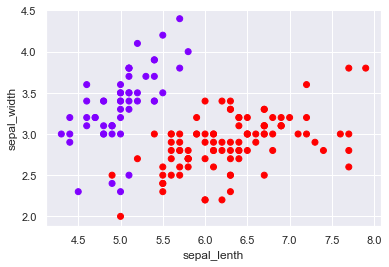

In [39]:
plt.scatter(clusters['sepal_length'],clusters['sepal_width'],c=clusters['clusters_pred'],cmap='rainbow')
plt.xlabel('sepal_lenth')
plt.ylabel('sepal_width')

# Standardize the variables

Import and use the <i> method </i> function from sklearn to standardize the data. 

In [40]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)

# Clustering (scaled data)

In [41]:
kmeans_scaled=KMeans(2)

In [42]:
clusters_scaled = data.copy()

clusters_scaled['clusters_pred']=kmeans_scaled.fit_predict(x_scaled)

Text(0, 0.5, 'sepal_width')

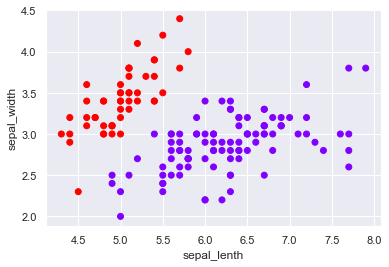

In [43]:
plt.scatter(clusters_scaled['sepal_length'],clusters_scaled['sepal_width'],c=clusters_scaled['clusters_pred'],cmap='rainbow')
plt.xlabel('sepal_lenth')
plt.ylabel('sepal_width')

Looks like the two solutions are identical. That is because the original features have very similar scales to start with!

## Take Advantage of the Elbow Method

### WCSS

In [44]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit_predict(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[600.0000000000003,
 223.73200573676343,
 140.96581663074699,
 114.9009939884948,
 91.07563926881433,
 80.23060704506956,
 72.01011863761892,
 62.87956074327273,
 55.61636517634348]

### The Elbow Method

Text(0, 0.5, 'wcss')

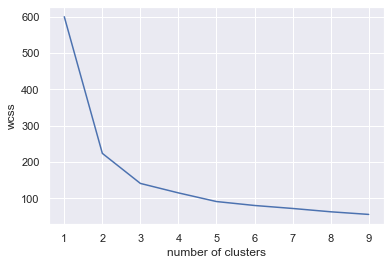

In [45]:
plt.plot(range(1,10),wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')

In [46]:
def kmeans_cluster(cluster):
    kmeans1=KMeans(cluster)
    identified_clusters=kmeans1.fit_predict(x_scaled)
    data_with_cluster=data.copy()
    data_with_cluster['cluster']=identified_clusters
    plt.scatter(data_with_cluster['sepal_length'],data_with_cluster['sepal_width'],
           c=data_with_cluster['cluster'],cmap='rainbow')
    plt.xlabel('sepal_length')
    plt.ylabel('sepal_width')
    plt.show()

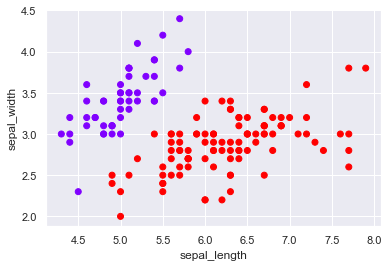

In [47]:
kmeans_cluster(2)

# 3 Clusters

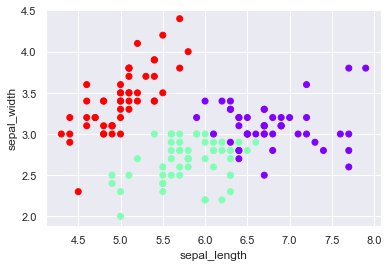

In [48]:
kmeans_cluster(3)

# 5 Clusters

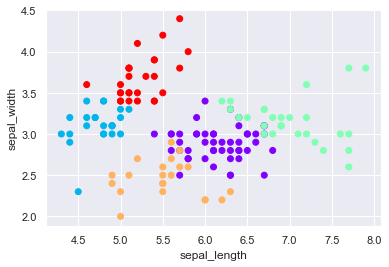

In [49]:
kmeans_cluster(5)

# Compare your solutions to the original iris dataset

The original (full) iris data is located in <i>iris_with_answers.csv</i>. Load the csv, plot the data and comparing it with solution. 


In [50]:
real_data = pd.read_csv('iris_with_answers.csv')

In [51]:
real_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [52]:
real_data['species'] = real_data['species'].map({'setosa':0, 'versicolor':1 , 'virginica':2})

In [53]:
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Scatter plots (which we will use for comparison)

Looking at the first graph it seems like the clustering solution is much more intertwined than what we imagined (and what we found before)

# REAL WORLD

Text(0, 0.5, 'sepal_width')

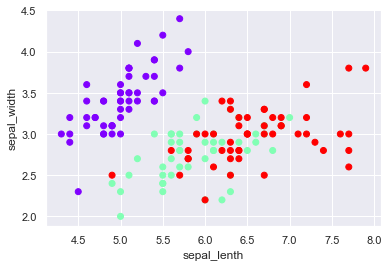

In [54]:
plt.scatter(real_data['sepal_length'], real_data['sepal_width'], c= real_data ['species'], cmap = 'rainbow')
plt.xlabel('sepal_lenth')
plt.ylabel('sepal_width')

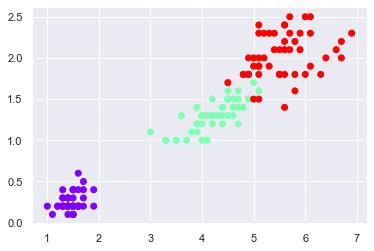

In [66]:
plt.scatter(real_data['petal_length'], real_data['petal_width'], c= real_data ['species'], cmap = 'rainbow')

# Our clustering solution data

for 3 clusters

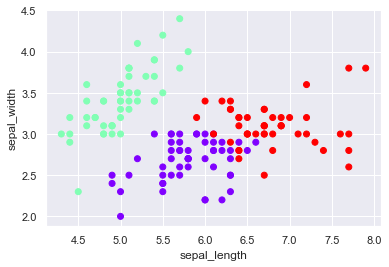

In [67]:
kmeans_cluster(3)

In [64]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)
clusters_3 = x.copy()
clusters_3['cluster_pred']=kmeans_3.fit_predict(x_scaled)

Text(0, 0.5, 'petal_length')

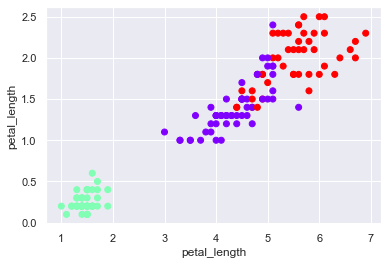

In [65]:
plt.scatter(clusters_3['petal_length'], clusters_3['petal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')
plt.xlabel('petal_length')
plt.ylabel('petal_length')

In fact, if you read about it, the original dataset has 3 sub-species of the Iris flower. Therefore, the number of clusters is 3